# **Model Training and Performance Evaluation**


## **1. Loading Data:**


In [658]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [659]:
#Loading the data
data0 = pd.read_csv('5.urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [660]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

## **2. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [661]:
##describe() is used to view statistical details
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [662]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()



To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [663]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,4,0,0,0,0,0,0,1,1,0,0,1,0,0
1,0,0,0,2,1,0,0,0,0,0,0,1,1,1,1,1,1
2,0,0,1,6,0,0,0,0,0,1,0,1,0,0,1,0,1
3,0,0,1,6,0,0,0,0,0,1,0,1,0,0,1,0,1
4,0,0,1,3,0,0,0,0,0,1,1,1,0,0,1,0,0


## **3. Splitting the Data**

In [664]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [665]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

## **4. Machine Learning Models & Training**

The supervised machine learning models (classification) considered to train the dataset are:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* XGBoost
* AdaBoost
* Gaussian Naive Bayes
* Support Vector Machines


In [666]:
#importing packages
from sklearn.metrics import accuracy_score

In [667]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **4.1. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.
 
In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [668]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier()
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [669]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [670]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.869
Decision Tree: Accuracy on test Data: 0.859


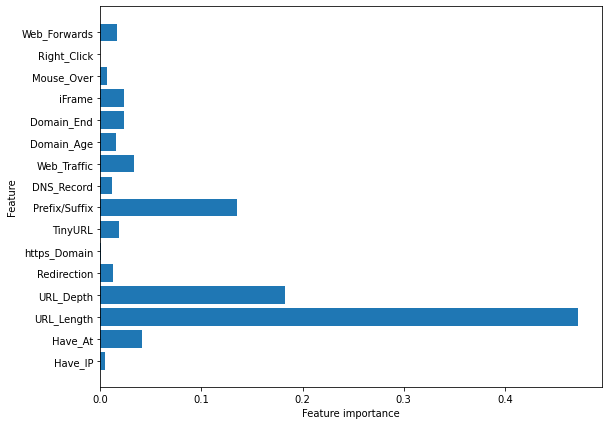

In [671]:
#checking the importance of each feature in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [672]:
#storing the results. 
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **4.2. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [673]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier()

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [674]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [675]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.869
Random forest: Accuracy on test Data: 0.860


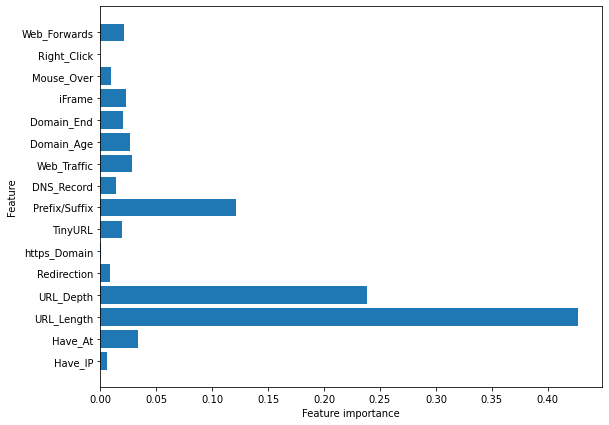

In [676]:
#checking the importance of each feature in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [677]:
#storing the results.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **4.3. Multilayer Perceptrons (MLPs): Deep Learning**
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [678]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100, 100], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [679]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Performance Evaluation:**

In [680]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.866
Multilayer Perceptrons: Accuracy on test Data: 0.860


**Feature Importance:**

Multilayer Perceptron doesn't have feature importance and depends on complex co-adaptations of weights during the training phase instead of measuring and comparing quality of splits Or a perceptron from Scikit can be used, which is a single layer neural network.

**Storing the results:**

In [681]:
#storing the results. 
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### **4.4. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [682]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.4, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [683]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [684]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.855
XGBoost : Accuracy on test Data: 0.851


**Storing the results:**

In [685]:
#storing the results. 
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

###  **4.5. AdaBoost Classifier**

In [686]:
#XGBoost Classification model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
hybrid_model_AB = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=10
)
hybrid_model_AB.fit(X_train, y_train)
predicted_test_labels = hybrid_model_AB.predict(X_test)


In [687]:
#predicting the target value from the model for the samples
y_test_ab = hybrid_model_AB.predict(X_test)
y_train_ab = hybrid_model_AB.predict(X_train)

In [688]:
#computing the accuracy of the model performance
acc_train_ab = accuracy_score(y_train,y_train_ab)
acc_test_ab = accuracy_score(y_test,y_test_ab)

print("AdaBoost: Accuracy on training Data: {:.3f}".format(acc_train_ab))
print("AdaBoost : Accuracy on test Data: {:.3f}".format(acc_test_ab))

AdaBoost: Accuracy on training Data: 0.838
AdaBoost : Accuracy on test Data: 0.838


In [689]:
#storing the results. 
storeResults('AdaBoost', acc_train_ab, acc_test_ab)

### **4.6. Gaussian Naive Bayes Classifier**

In [690]:
#importing Naives Bayes Classifier model
from sklearn.naive_bayes import GaussianNB

#instantiate the model
gnb = GaussianNB()

#model fitting
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [691]:
#predicting the target value from the model for the samples
y_test_gnb = gnb.predict(X_test)
y_train_gnb = gnb.predict(X_train)

**Performance Evaluation:**

In [692]:
#computing the accuracy of model
acc_train_gnb = accuracy_score(y_train,y_train_gnb)
acc_test_gnb = accuracy_score(y_test,y_test_gnb)

print("Gaussian Naive Bayes : Accuracy on training Data: {:.3f}".format(acc_train_gnb))
print("Gaussian Naive Bayes : Accuracy on test Data: {:.3f}".format(acc_test_gnb))

Gaussian Naive Bayes : Accuracy on training Data: 0.792
Gaussian Naive Bayes : Accuracy on test Data: 0.791


**Storing the results:**

In [693]:
#storing the results. 
storeResults('Gaussian Naive Bayes', acc_train_gnb, acc_test_gnb)

### **4.7. Support Vector Machines**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [694]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=42)
#fit the model
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [695]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [696]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.802
SVM : Accuracy on test Data: 0.804


**Storing the results:**

In [697]:
#storing the results. 
storeResults('SVM', acc_train_svm, acc_test_svm)

## **5. Comparision of Models**
Using a simple dataframe to compare the above models.

In [698]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.869,0.858
1,Random Forest,0.869,0.860
2,Multilayer Perceptrons,0.866,0.860
3,XGBoost,0.855,0.851
4,AdaBoost,0.838,0.838
5,Gaussian Naive Bayes,0.792,0.792
6,SVM,0.802,0.804


# **6. Hybrid Models**

The below classifiers are considered for stacking based on their individual accuracies
1. Random Forest
2. AdaBoost
3. XGBoost
4. Decision Tree




### **Model-A : Gaussian Naive Bayes and Random Forest**
Below is the implementation of combination of Gaussian Naive Bayes and Random Forest algorithms. This combination is considered seperately(Journal article reference which concludes that the mentioned combination gives the best accuracy).

In [699]:
import mlxtend as md
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [700]:
# defining meta-classifier

lr = LogisticRegression(solver='lbfgs', max_iter=400)  
clf_stack = StackingClassifier(classifiers =[forest, gnb], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)

In [701]:
 # training of stacked model
model_stack = clf_stack.fit(X_train, y_train)
pred_stack_train = model_stack.predict(X_train)  
pred_stack_test = model_stack.predict(X_test) 

 **Performance Evaluation:**

In [702]:
#computing the accuracy of the model performance

acc_stack_train = accuracy_score(y_train, pred_stack_train)
acc_stack_test =  accuracy_score(y_test, pred_stack_test) 

print("NB & RF : Accuray score of Stacked model: {:.3f}".format(acc_stack_train))
print("NB & RF : Accuray score of Stacked model: {:.3f}".format(acc_stack_test))

NB & RF : Accuray score of Stacked model: 0.869
NB & RF : Accuray score of Stacked model: 0.862


 **Storing the results:**

In [703]:
#storing the results. 
storeResults('Random forest & Naive Bayes', acc_stack_train, acc_stack_test)

###**Model-B : Stacking Random Forest with Decision Tree**




In [704]:
# defining meta-classifier

lrx = LogisticRegression(solver='lbfgs', max_iter=400)  
clf_stackx = StackingClassifier(classifiers =[forest, tree], meta_classifier = lrx, use_probas = True, use_features_in_secondary = True)

In [705]:
# training of stacked model
model_stackx = clf_stackx.fit(X_train, y_train)
pred_stackx_train = model_stackx.predict(X_train)  
pred_stackx_test = model_stackx.predict(X_test) 

 **Performance Evaluation:**

In [706]:
#computing the accuracy of the model performance

acc_stackx_train = accuracy_score(y_train, pred_stackx_train)
acc_stackx_test =  accuracy_score(y_test, pred_stackx_test) 

print("DT & RF : Accuray score of Stacked model: {:.3f}".format(acc_stackx_train))
print("DT & RF : Accuray score of Stacked model: {:.3f}".format(acc_stackx_test))

DT & RF : Accuray score of Stacked model: 0.869
DT & RF : Accuray score of Stacked model: 0.862


**Storing the results:**

In [707]:
#storing the results. 
storeResults('Decision Tree & Randome Forest', acc_stackx_train, acc_stackx_test)

### **Model-C : Stacking Random Forest with XGBoost**

In [708]:
# defining meta-classifier

lry = LogisticRegression(solver='lbfgs', max_iter=400)  
clf_stacky = StackingClassifier(classifiers =[forest, xgb], meta_classifier = lry, use_probas = True, use_features_in_secondary = True)

In [709]:
# training of stacked model
model_stacky = clf_stacky.fit(X_train, y_train)
pred_stacky_train = model_stacky.predict(X_train)  
pred_stacky_test = model_stacky.predict(X_test) 

**Performance Evaluation:**

In [710]:
#computing the accuracy of the model performance

acc_stacky_train = accuracy_score(y_train, pred_stacky_train)
acc_stacky_test =  accuracy_score(y_test, pred_stacky_test) 

print("XGB & RF : Accuray score of Stacked model: {:.3f}".format(acc_stacky_train))
print("XGB & RF : Accuray score of Stacked model: {:.3f}".format(acc_stacky_test))

XGB & RF : Accuray score of Stacked model: 0.869
XGB & RF : Accuray score of Stacked model: 0.862


**Storing the results:**

In [711]:
#storing the results. 
storeResults('XGBoost & Random Forest', acc_stacky_train, acc_stacky_test)

### **Model-D : Stacking Decision Tree with AdaBoost**

In [712]:
# defining meta-classifier

lrz = LogisticRegression(solver='lbfgs', max_iter=400)  
clf_stackz = StackingClassifier(classifiers =[tree, hybrid_model_AB], meta_classifier = lrz, use_probas = True, use_features_in_secondary = True)

In [713]:
# training of stacked model
model_stackz = clf_stackz.fit(X_train, y_train)
pred_stackz_train = model_stackz.predict(X_train)  
pred_stackz_test = model_stackz.predict(X_test) 

**Performance Evaluation:**

In [714]:
#computing the accuracy of the model performance

acc_stackz_train = accuracy_score(y_train, pred_stackz_train)
acc_stackz_test =  accuracy_score(y_test, pred_stackz_test) 

print("DT & ADB : Accuray score of Stacked model: {:.3f}".format(acc_stackz_train))
print("DT & ADB : Accuray score of Stacked model: {:.3f}".format(acc_stackz_test))

DT & ADB : Accuray score of Stacked model: 0.869
DT & ADB : Accuray score of Stacked model: 0.861


**Storing results:**

In [715]:
#storing the results. 
storeResults('Decision Tree & AdaBoost', acc_stackz_train, acc_stackz_test)

### **Model-E : Stacking Random Forest with AdaBoost Classifier**

In [716]:
# defining meta-classifier

lrm = LogisticRegression(solver='lbfgs', max_iter=400)  
clf_stackm = StackingClassifier(classifiers =[forest, hybrid_model_AB], meta_classifier = lrm, use_probas = True, use_features_in_secondary = True)

In [717]:
# training of stacked model
model_stackm = clf_stackm.fit(X_train, y_train)
pred_stackm_train = model_stackm.predict(X_train)  
pred_stackm_test = model_stackm.predict(X_test) 

**Performance Evaluation:**

In [718]:
#computing the accuracy of the model performance

acc_stackm_train = accuracy_score(y_train, pred_stackm_train)
acc_stackm_test =  accuracy_score(y_test, pred_stackm_test) 

print("ADB & RF : Accuray score of Stacked model: {:.3f}".format(acc_stackz_train))
print("ADB & RF : Accuray score of Stacked model: {:.3f}".format(acc_stackz_test))

ADB & RF : Accuray score of Stacked model: 0.869
ADB & RF : Accuray score of Stacked model: 0.861


**Storing the result:**

In [719]:
#storing the results. 
storeResults('AdaBoost & Random Forest', acc_stackm_train, acc_stackm_test)

### **Model-F : Stacking Decision Tree with XGBoost**

In [720]:
# defining meta-classifier

lra = LogisticRegression(solver='lbfgs', max_iter=400)  
clf_stacka = StackingClassifier(classifiers =[tree, xgb], meta_classifier = lra, use_probas = True, use_features_in_secondary = True)

In [721]:
# training of stacked model
model_stacka = clf_stacka.fit(X_train, y_train)
pred_stacka_train = model_stacka.predict(X_train)  
pred_stacka_test = model_stacka.predict(X_test) 

**Performance Evaluation:**

In [722]:
#computing the accuracy of the model performance

acc_stacka_train = accuracy_score(y_train, pred_stacka_train)
acc_stacka_test =  accuracy_score(y_test, pred_stacka_test) 

print("XGB & DT : Accuray score of Stacked model: {:.3f}".format(acc_stacka_train))
print("XGB & DT : Accuray score of Stacked model: {:.3f}".format(acc_stacka_test))

XGB & DT : Accuray score of Stacked model: 0.869
XGB & DT : Accuray score of Stacked model: 0.861


**Storing the results:**

In [723]:
#storing the results. 
storeResults('XGBoost & Decision Tree', acc_stacka_train, acc_stacka_test)

### **Model-G : Stacking XGBoost with AdaBoost**

In [724]:
# defining meta-classifier

lrb = LogisticRegression(solver='lbfgs', max_iter=400)  
clf_stackb = StackingClassifier(classifiers =[xgb, hybrid_model_AB], meta_classifier = lrb, use_probas = True, use_features_in_secondary = True)

In [725]:
# training of stacked model
model_stackb = clf_stackb.fit(X_train, y_train)
pred_stackb_train = model_stackb.predict(X_train)  
pred_stackb_test = model_stackb.predict(X_test) 

**Performance Evaluation:**

In [726]:
#computing the accuracy of the model performance

acc_stackb_train = accuracy_score(y_train, pred_stackb_train)
acc_stackb_test =  accuracy_score(y_test, pred_stackb_test) 

print("XGB & ADB : Accuray score of Stacked model: {:.3f}".format(acc_stackb_train))
print("XGB & ADB : Accuray score of Stacked model: {:.3f}".format(acc_stackb_test))

XGB & ADB : Accuray score of Stacked model: 0.853
XGB & ADB : Accuray score of Stacked model: 0.843


**Storing results:**

In [727]:
#storing the results. 
storeResults('XGBoost & AdaBoost', acc_stackb_train, acc_stackb_test)

## **7. Comparision of Models**

In [728]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.869,0.858
1,Random Forest,0.869,0.860
2,Multilayer Perceptrons,0.866,0.860
3,XGBoost,0.855,0.851
4,AdaBoost,0.838,0.838
5,Gaussian Naive Bayes,0.792,0.792
6,SVM,0.802,0.804
7,Random forest & Naive Bayes,0.869,0.862
8,Decision Tree & Randome Forest,0.868,0.862
9,XGBoost & Random Forest,0.869,0.862


In [729]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
7,Random forest & Naive Bayes,0.869,0.862
9,XGBoost & Random Forest,0.869,0.862
11,AdaBoost & Random Forest,0.869,0.862
8,Decision Tree & Randome Forest,0.868,0.862
1,Random Forest,0.869,0.860
10,Decision Tree & AdaBoost,0.869,0.860
12,XGBoost & Decision Tree,0.868,0.860
2,Multilayer Perceptrons,0.866,0.860
0,Decision Tree,0.869,0.858
3,XGBoost,0.855,0.851
